# 1. Setup

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns

from pymodulon import io

from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.util import infer_activities, explained_variance

## Load the ICA data object

In [64]:
ica_data = io.load_json_model('../mtb_ica.json')

## Load the expression data

In [65]:
tpm_file = 'example_tpm.csv' # Replace this with your TPM file

In [66]:
tpm = pd.read_csv(tpm_file, index_col=0)
tpm.head()

,ctrl_1,ctrl_2,ctrl_3,levofloxacin_1,levofloxacin_2,levofloxacin_3
Geneid,,,,,,
Rv0001,43.291670,57.997692,61.461493,174.298187,186.849710,206.928391
Rv0002,111.646495,126.677929,118.348454,172.232659,181.741154,184.895990
Rv0003,19.608825,21.890025,25.543310,89.805316,113.033258,125.090178
Rv0004,29.971833,37.179148,28.511932,85.380360,114.263880,121.716070
Rv0005,389.709274,406.457392,361.856354,1124.830085,1598.520078,1663.600726


In [67]:
log_tpm = np.log2(tpm+1)
log_tpm.head()

,ctrl_1,ctrl_2,ctrl_3,levofloxacin_1,levofloxacin_2,levofloxacin_3
Geneid,,,,,,
Rv0001,5.468963,5.882587,5.964895,7.453667,7.553435,7.699943
Rv0002,6.815659,6.996365,6.899036,7.436567,7.513658,7.538352
Rv0003,4.365190,4.516647,4.730276,6.504705,6.833311,6.978312
Rv0004,4.952885,5.254713,4.883226,6.432631,6.848797,6.939180
Rv0005,8.609952,8.670505,8.503255,10.136773,10.643423,10.700960


### Center expression data to reference

In [68]:
reference_conditions = ['ctrl_1', 'ctrl_2', 'ctrl_3'] # Replace this with your control condition(s)

In [69]:
log_tpm_norm = log_tpm.subtract(log_tpm[reference_conditions].mean(axis=1), axis=0)

# 2. Infer iModulon Activities

In [70]:
new_A = infer_activities(ica_data,log_tpm_norm)
new_A

/home/anand/miniconda3/envs/pymodulon/lib/python3.8/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,ctrl_1,ctrl_2,ctrl_3,levofloxacin_1,levofloxacin_2,levofloxacin_3
SigH,0.581315,0.296107,-0.877422,-2.449652,-2.724111,-2.913411
Polyketide Synthase Complex,0.250063,-0.077162,-0.172901,2.043456,4.991406,4.482116
IniR,-0.227634,0.196232,0.031402,1.223337,1.509360,1.362482
PyrR,0.717234,-0.662688,-0.054546,2.195382,1.496037,1.752457
WhiB4,0.502302,-0.455921,-0.046381,5.414587,7.102635,6.869835
...,...,...,...,...,...,...
Unc_9,0.006535,0.190818,-0.197353,1.538270,1.529223,0.899365
SG_13,-0.021870,-0.703529,0.725399,-1.705576,-2.922751,-2.568781
Central Carbon Metabolism,0.892938,-0.011735,-0.881203,-3.214607,-3.527942,-3.558974
Positive Regulation of Growth,0.267426,-0.081075,-0.186352,-6.393615,-6.817248,-5.408406


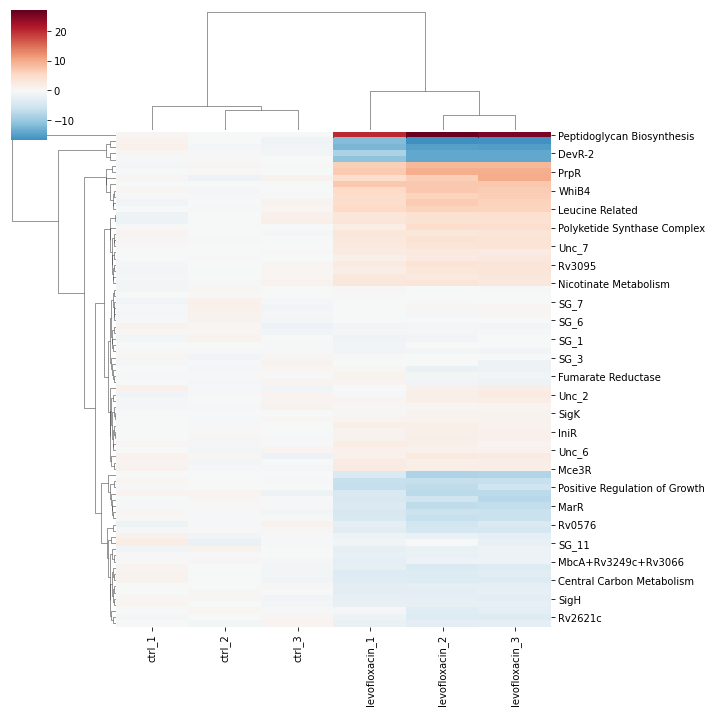

In [110]:
sns.clustermap(new_A, center=0, cmap='RdBu_r')

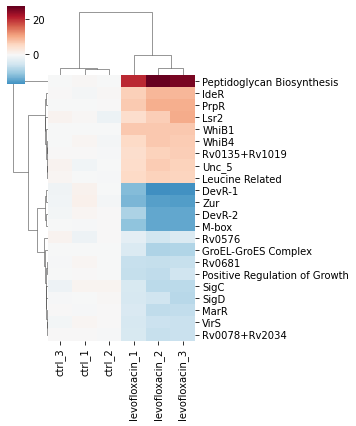

In [122]:
# Alternatively, only plot activities of iModulons with a minimum activity of +/-5

figsize = (5,6) # Adjust this to improve readability of the clustermap below

sns.clustermap(new_A[(abs(new_A) > 5).any(axis=1)], center=0, cmap='RdBu_r', figsize=figsize)

# 3. (Optional) Create a new IcaData object
To use the extensive plotting functions developed for the PyModulon python package, you can create your own IcaData object with your data. Most information will be copied over from the old IcaData object. The major differences will be:
1. The new Activity matrix
2. The new log_tpm_norm matrix
3. New sample metadata information (i.e. sample_table)

In [87]:
sample_table_file = 'example_metadata.csv' # Replace this with your new sample table/metadata file

In [94]:
new_sample_table = pd.read_csv('example_metadata.csv',index_col=0)
new_sample_table.head()

,BioProject,BioSample,SRA ID,project,condition,reference_condition,full_name
ctrl_1,PRJNA579441,SAMN13111571,9273261,levofloxacin,control,control,levofloxacin:control
ctrl_2,PRJNA579441,SAMN13111569,9273259,levofloxacin,control,control,levofloxacin:control
ctrl_3,PRJNA579441,SAMN13111570,9273260,levofloxacin,control,control,levofloxacin:control
levofloxacin_1,PRJNA579441,SAMN13111573,9273263,levofloxacin,treated,control,levofloxacin:treated
levofloxacin_2,PRJNA579441,SAMN13111572,9273262,levofloxacin,treated,control,levofloxacin:treated


In [95]:
new_data = IcaData(M = ica_data.M, 
                   A = new_A, 
                   X = log_tpm_norm,
                   gene_table = ica_data.gene_table,
                   sample_table = new_sample_table,
                   imodulon_table = ica_data.imodulon_table)

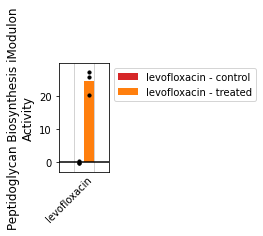

In [102]:
plot_activities(new_data,'Peptidoglycan Biosynthesis',highlight='levofloxacin') # You can replace levofloxacin with your project name

In [140]:
print('iModulon activities explain {:.0f}% of the expression variance in the new dataset'.format(explained_variance(new_data)*100))

print('The Peptidoglycan Biosynthesis iModulon explains {:.0f}% of the expression variance in the new dataset' \
        .format(explained_variance(new_data,imodulons=['Peptidoglycan Biosynthesis'])*100)) # You can replace Peptidoglycan Biosynthesis with any iModulon, or list of iModulons

iModulon activities explain 56% of the expression variance in the new dataset
The Peptidoglycan Biosynthesis iModulon explains 14% of the expression variance in the new dataset
